# Week 10: Model fitting

This week's learning goals are as follows:

1. Learn linear regression.
1. Learn how to fit models in Python.

We are following the GNUplot-based blog post here: http://furan5.blogspot.com/2015/01/fitting-michaelis-menten-equation-to.html

In [1]:
# the following code guarantees you'll properly reload any modules that you custom-defined in your environment.
# you don't need to understand it.
# just run this once at the beginning.
# for auto-reloading external modules
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2
import os
import sys
import numpy as np
import csv
import matplotlib as mpl
import matplotlib.pyplot as plt

In [36]:
substrates, rates = [], []
with open(os.path.join('csvs', 'enzyme.csv'), 'r') as f:
    for tup in csv.reader(f, delimiter=','):
        substrates.append(float(tup[0]))
        rates.append(float(tup[1]))
sort_inds = np.argsort(substrates)
substrates = np.array(substrates)[sort_inds]
rates = np.array(rates)[sort_inds]


In [37]:
substrate_label = 'substrate (M)'
rate_label = 'rates (M/sec)'
print(substrate_label, substrates)
print(rate_label, rates)

substrate (M) [0.25 0.25 0.5  0.5  1.   1.   2.   2.   3.   3.   4.   4.   9.   9.  ]
rates (M/sec) [0.2005 0.2005 0.3139 0.3139 0.5085 0.5085 0.749  0.749  0.7016 0.7016
 0.906  0.906  0.944  0.944 ]


Text(0.5,1,'Michaelis-Menten enzyme kinetics')

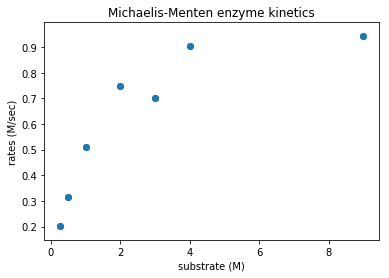

In [44]:
fig = plt.figure(0)
ax = plt.gca()
ax.scatter(substrates, rates)
ax.set_xlabel(substrate_label)
ax.set_ylabel(rate_label)
ax.set_title('Michaelis-Menten enzyme kinetics')

Use SciPy's curve fitting library
https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.curve_fit.html

In [11]:
from scipy.optimize import curve_fit

In [26]:
def mm_eq(x, a, b):
    return (a*x)/(x+b)

parameters [1.07842629 1.1099902 ]
pcov [[0.00178987 0.00511856]
 [0.00511856 0.01969837]]


Text(0.5,1,'Michaelis-Menten enzyme kinetics')

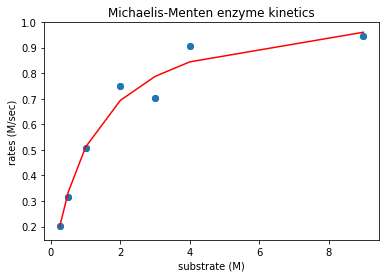

In [49]:
popt, pcov = curve_fit(mm_eq, substrates, rates)
print('parameters', popt)
print('pcov', pcov)

fig = plt.figure(0)
ax = plt.gca()
ax.scatter(substrates, rates)
ax.set_xlabel(substrate_label)
ax.set_ylabel(rate_label)
ax.set_title('Michaelis-Menten enzyme kinetics')
ax.plot(substrates, mm_eq(substrates, *popt), 'r-',
        label='fit: a=%5.3f, b=%5.3f' % tuple(popt))
ax.set_title('Michaelis-Menten enzyme kinetics')